<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Reviewer's comment v1</h1>

Hello Harvey, my name is Dmitrii Pyshnenko. Happy to review your project! 🙌

As usual you can find my comments under the heading **«Review»**. I will categorize my comments in green, blue or red boxes like this:

<div class="alert alert-success">
    <b>Success:</b> if everything is done successfully
</div>
<div class="alert alert-warning">
    <b>Remarks:</b> if I can give some recommendations or ways to improve the project
</div>
<div class="alert alert-danger">
    <b>Needs fixing:</b> if the block requires some corrections. Work can't be accepted with the red comments
</div>

Please don't remove my comments :) If you have any questions don't hesitate to respond to my comments in a different section. 



<div style="border:solid green 2px; padding: 20px">
<b>Reviewer's comment v1</b>
    
<b>Overall Feedback</b> 
    
Overall well done! I can see that a lot of effort has been made! Your project already looks really good, and you accomplished impressive results.

However, there are some comments/areas left to fix that will help you to make your project even better:

- Add data rounding for web traffic. 
- Fix data joining (we need monthly data per user).
- Update the initial method for filling missing data. 
    
And of course, if you have any questions along the way, remember that you can always reach out to your tutor for any clarification.
</div>

<div style="border:solid green 2px; padding: 20px">
<b>Reviewer's comment v2:</b>
    
<b>Overall Feedback</b> 
    
Hi Harvey. Thank you for submitting your project with all corrections! 
- Now everything is perfect. No critial issues left, so your project has been accepted! 
- Wish you cool projects in the next sprints! ☘️
    
PS: As a last thing, I can recommend cool lectures on stat analysis here: https://www.youtube.com/playlist?list=PL2SOU6wwxB0uwwH80KTQ6ht66KWxbzTIo  🙌

</div>

# Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b>
 
Great that you added additional information about the project goal and tasks.

## Initialization

Let's begin by loading all necessary libraries for this project.

In [1]:
# Loading all the libraries
import pandas as pd
import numpy as np 
import random
import matplotlib.pyplot as plt
from scipy import stats as st
import math

## Load data

Let's go ahead to load the data files into dataframes

In [2]:
# Load the data files into different DataFrames
df_calls = pd.read_csv('/datasets/megaline_calls.csv')
df_internet = pd.read_csv('/datasets/megaline_internet.csv')
df_messages = pd.read_csv('/datasets/megaline_messages.csv')
df_plans = pd.read_csv('/datasets/megaline_plans.csv')
df_users = pd.read_csv('/datasets/megaline_users.csv')

## Prepare the data

The data for this project is split into several tables. Let's explore each one to get an initial understanding of the data.

In [3]:
# Visualising calls data frame.
display(df_calls.head(10))
print(df_calls.info())
df_calls.describe()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None


,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


In [4]:
# Visualising internet data frame.
display(df_internet.head(10))
print(df_internet.info())
df_internet.describe()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None


,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


In [5]:
# Visualising message data frame.
display(df_messages.head(10))
print(df_messages.info())
df_messages.describe()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None


,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


In [6]:
# Visualising plans data frame.
display(df_plans.head(10))
print(df_plans.info())
df_plans.describe()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes
None


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


In [7]:
# Visualising users data frame.
display(df_users.head(10))
print(df_users.info())
df_users.describe()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


After visualizing each dataframe, we can see that most of them appear to be clean with no missing values. Let's take a closer look at each one and fix any problems we may find.

## Plans

In [8]:
# Print the general/summary information about the plans' DataFrame

display(df_plans.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


None

In [9]:
# Print a sample of data for plans

display(df_plans.head(10))

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


From the information above, we see that the plans dataframe has no missing values and contains appropriate data types for each column. This data frame provides information on what each plan entails.

## Users

In [10]:
# Print the general/summary information about the users' DataFrame
df_users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [11]:
# Print a sample of data for users
display(df_users)


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN


The users dataframe appears to have some problems. Firstly, there are missing values in the column `churn_date`. These are categorical values and so we cannot fill them conventionally. Also, from the description of this data frame, this column only contains values of inactive customers. It's no wonder there are so many missing values here.

Secondly, the reg_date column is not stored with the correct data type. Let's try fixing these problems.

<div class="alert alert-success">
<b>Reviewer's comment v1:</b>
    
Good start and first view on data! 

### Fix Data

In [12]:
# Converting reg_date colume to datetime format.
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format= '%Y-%m-%d')

In [13]:
# View data types
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


In [14]:
# Working on churn_date column
display(df_users[df_users['churn_date'].isna() == False].head(10))

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
12,1012,Jonelle,Mcbride,59,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-06-28,surf,2018-11-16
22,1022,Bo,Snow,73,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-20,surf,2018-09-07
40,1040,Paris,Santos,72,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-12-23,surf,2018-12-30
50,1050,Jone,Owen,23,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-03-20,ultimate,2018-10-07
54,1054,Denis,Frost,50,"Phoenix-Mesa-Chandler, AZ MSA",2018-04-21,surf,2018-12-31
67,1067,Robt,Allen,37,"Grand Rapids-Kentwood, MI MSA",2018-09-24,surf,2018-11-24
83,1083,Lyndia,Acevedo,65,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-10-26,surf,2018-12-18
84,1084,Wiley,Mckinney,21,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-06-04,surf,2018-11-11
94,1094,Walter,Petersen,54,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-10-30,surf,2018-12-12


### Enrich Data

In [15]:
# Creating a function to sort users into active and inactive users based on churn date
def user_stat(value):
    if pd.isna(value['churn_date']) == False:
        return 'inactive user'
    else:
        return 'active user'

In [16]:
# Applying function to the database to create a new column
df_users['status'] = df_users.apply(user_stat, axis=1)
display(df_users.head(10))

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,status
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,active user
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,active user
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN,active user
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN,active user
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN,active user
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN,active user
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,inactive user
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN,active user
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN,active user
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN,active user


<div class="alert alert-block alert-warning">
<b>Reviewer's comment v1:</b>
    
Everything is correct here but usually, it is always helpful to double-check whether we indeed have data within one year/time period. If not then selecting and aggregating data by the month number will cause an issue. So here it is safer to use datetime64[M] which provides a complete date. 

Seeing as the user dataframe has just the registration dates for each user, adding a month column doesn't seem necessary as the information given does not provide monthly comparisons.

With the appropriate data type and users sorted, it's easier to work with this data now.

## Calls

In [17]:
# Print the general/summary information about the calls' DataFrame

df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [18]:
# Print a sample of data for calls

df_calls.head(10)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


No missing values, but the `call_date` column does appear to be in the wrong data type format. Let's rectify that.

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [19]:
# Round up seconds to minutes
df_calls['duration'] = np.ceil(df_calls['duration'])
print(df_calls.head())

         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27       9.0
1  1000_145     1000  2018-12-27      14.0
2  1000_247     1000  2018-12-27      15.0
3  1000_309     1000  2018-12-28       6.0
4  1000_380     1000  2018-12-30       5.0


<div class="alert alert-block alert-success">
<b>Reviewer's comment v2:</b>
    
Ok, great job! Also, great choice of np.ceil () method.

In [20]:
# Convert duration column to integer
df_calls['duration'] = df_calls['duration'].astype('int')

In [21]:
# Convert call_date column to datetime
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format = '%Y-%m-%d')

In [22]:
# Checking user_id column
df_calls['user_id'].value_counts()

1324    1300
1077    1224
1334    1140
1362    1121
1320    1080
        ... 
1104       4
1452       3
1306       3
1323       3
1034       2
Name: user_id, Length: 481, dtype: int64

In [23]:
# Print data frame info
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 4.2+ MB


### Enrich data

Let's add a `month` column to the dataset, it'll help us with our analysis later on.

In [24]:
# Add a month column to the dataset
df_calls['month'] = pd.DatetimeIndex(df_calls['call_date']).month
df_calls.head(10)

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,9,12
1,1000_145,1000,2018-12-27,14,12
2,1000_247,1000,2018-12-27,15,12
3,1000_309,1000,2018-12-28,6,12
4,1000_380,1000,2018-12-30,5,12
5,1000_388,1000,2018-12-31,3,12
6,1000_510,1000,2018-12-27,6,12
7,1000_521,1000,2018-12-28,15,12
8,1000_530,1000,2018-12-28,6,12
9,1000_544,1000,2018-12-26,5,12


## Messages

In [25]:
# Print the general/summary information about the messages' DataFrame

df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [26]:
# Print a sample of data for messages

df_messages.head(10)

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


No missing values, still the issue of data type in the `message_date` column.

### Fix data

In [27]:
#convert message_date column to datetime
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format= '%Y-%m-%d')

In [28]:
# print dataframe info 
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


### Enrich data

Let's add a `month` column here too

In [29]:
# Add a month column to the dataset
df_messages['month'] = pd.DatetimeIndex(df_messages['message_date']).month
df_messages.head(10)

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12
5,1000_346,1000,2018-12-29,12
6,1000_386,1000,2018-12-30,12
7,1000_413,1000,2018-12-31,12
8,1000_502,1000,2018-12-27,12
9,1000_525,1000,2018-12-28,12


## Internet

In [30]:
# Print the general/summary information about the internet DataFrame
df_internet.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [31]:
# Print a sample of data for the internet traffic

df_internet.head(10)

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92


Same problem with inappropriate data type in the `session_date` column. Let's work on that.

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [32]:
# Convert session_date column to datetime
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format= '%Y-%m-%d')

In [33]:
# print data frame info
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


### Enrich data

And we'll add a `month` column here.

In [34]:
# Add a month column to the dataset
df_internet['month'] = pd.DatetimeIndex(df_internet['session_date']).month
df_internet.head(10)

,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12
5,1001_0,1001,2018-08-24,284.68,8
6,1001_3,1001,2018-12-09,656.04,12
7,1001_4,1001,2018-11-04,16.97,11
8,1001_10,1001,2018-11-27,135.18,11
9,1001_15,1001,2018-12-13,761.92,12


## Study plan conditions

It is critical to understand how the plans work, how users are charged based on their plan subscription. So, it's best to print out the plan information to view their conditions once again.

In [35]:
# Print out the plan conditions and make sure they are clear 

df_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Aggregate data per user

Now, as the data is clean, let's aggregate data per user per period in order to have just one record per user per period. It should ease the further analysis a lot.

In [36]:
# Calculate the number of calls made by each user per month. Save the result.

calls_per_month = df_calls.pivot_table(index= ['user_id', 'month'], values = 'call_date', aggfunc = 'count').reset_index()
display(calls_per_month)

,user_id,month,call_date
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64
...,...,...,...
2253,1498,12,39
2254,1499,9,41
2255,1499,10,53
2256,1499,11,45


<div class="alert alert-block alert-warning">
<b>Reviewer's comment v1:</b>
    
In pivot_table or groupby it is possible to pass multiple arguments, so here, you can create an aggregated table in one go like this:

    data_calls.groupby(['user_id','month']).agg({'duration' : ('count','sum')}).reset_index()

or
    
    data_calls.pivot_table(index = ('user_id','month'), values = 'duration', aggfunc = ('count','sum')).reset_index()

In [37]:
# Calculate the amount of minutes spent by each user per month. Save the result.

minutes_per_month = df_calls.pivot_table(index= ['user_id', 'month'], values = 'duration', aggfunc = 'sum').reset_index()
display(minutes_per_month)

,user_id,month,duration
0,1000,12,124
1,1001,8,182
2,1001,9,315
3,1001,10,393
4,1001,11,426
...,...,...,...
2253,1498,12,339
2254,1499,9,346
2255,1499,10,385
2256,1499,11,308


<div class="alert alert-block alert-danger">
<b>Reviewer's comment v1:</b>
    
- Please note that the telecom operator rounds up all minutes and traffic values.

`Note: Megaline rounds seconds up to minutes, and megabytes to gigabytes. For calls, each individual call is rounded up: even if the call lasted just one second, it will be counted as one minute. For web traffic, individual web sessions are not rounded up. Instead, the total for the month is rounded up. If someone uses 1025 megabytes this month, they will be charged for 2 gigabytes.`

Can you please add data rounding?

Data rounding has been added. Though for `mb_used`, the function can be seen in the latter cells

In [38]:
# Calculate the number of messages sent by each user per month. Save the result.

messages_per_month = df_messages.pivot_table(index= ['user_id', 'month'], values = 'message_date', aggfunc = 'count').reset_index()
display(messages_per_month)

,user_id,month,message_date
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [39]:
# Calculate the volume of internet traffic used by each user per month. Save the result.

int_traffic_per_month = df_internet.pivot_table(index= ['user_id', 'month'], values = 'mb_used', aggfunc = 'sum').reset_index()
display(int_traffic_per_month)

,user_id,month,mb_used
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30
...,...,...,...
2272,1498,12,23137.69
2273,1499,9,12984.76
2274,1499,10,19492.43
2275,1499,11,16813.83


In [40]:
# Create function and round up mb_used column
def mb_round(value):
    if value['mb_used'] > 1024:
        return int(math.ceil(value['mb_used']/1000)) * 1000

int_traffic_per_month['mb_used'] = int_traffic_per_month.apply(mb_round, axis=1)
display(int_traffic_per_month)

,user_id,month,mb_used
0,1000,12,2000.0
1,1001,8,7000.0
2,1001,9,14000.0
3,1001,10,23000.0
4,1001,11,19000.0
...,...,...,...
2272,1498,12,24000.0
2273,1499,9,13000.0
2274,1499,10,20000.0
2275,1499,11,17000.0


[Put the aggregate data together into one DataFrame so that one record in it would represent what an unique user consumed in a given month.]

In [41]:
# Merge the data for calls, minutes, messages, internet based on user_id and month

ovr_monthly_table = calls_per_month.merge(minutes_per_month, on=['user_id', 'month'], how='outer').merge(messages_per_month, on=['user_id', 'month'], how='outer').merge(int_traffic_per_month, on=['user_id', 'month'], how='outer')
ovr_monthly_table.columns = ['user_id', 'month', 'number_of_calls', 'duration', 'number_of_messages', 'mb_used']
display(ovr_monthly_table)

,user_id,month,number_of_calls,duration,number_of_messages,mb_used
0,1000,12,16.0,124.0,11.0,2000.0
1,1001,8,27.0,182.0,30.0,7000.0
2,1001,9,49.0,315.0,44.0,14000.0
3,1001,10,65.0,393.0,53.0,23000.0
4,1001,11,64.0,426.0,36.0,19000.0
...,...,...,...,...,...,...
2288,1349,12,NaN,NaN,61.0,14000.0
2289,1361,5,NaN,NaN,2.0,2000.0
2290,1482,10,NaN,NaN,2.0,NaN
2291,1108,12,NaN,NaN,NaN,NaN


<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Indeed `how = 'outer' can be used here to prevent data loss.
    
By the way, it is also possible to group 3 tables at once using reduce. You can read about it here: https://www.codegrepper.com/code-examples/python/merge+more+than+2+dataframes+in+pandas

In [42]:
# Merge aggregated data to users data to get a grand monthly table
grand_monthly_table = ovr_monthly_table.merge(df_users, on=['user_id'], how='left')
display(grand_monthly_table)

,user_id,month,number_of_calls,duration,number_of_messages,mb_used,first_name,last_name,age,city,reg_date,plan,churn_date,status
0,1000,12,16.0,124.0,11.0,2000.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,active user
1,1001,8,27.0,182.0,30.0,7000.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,active user
2,1001,9,49.0,315.0,44.0,14000.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,active user
3,1001,10,65.0,393.0,53.0,23000.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,active user
4,1001,11,64.0,426.0,36.0,19000.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,active user
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1349,12,NaN,NaN,61.0,14000.0,Florentina,Diaz,69,"Boston-Cambridge-Newton, MA-NH MSA",2018-10-01,surf,NaN,active user
2289,1361,5,NaN,NaN,2.0,2000.0,Jacelyn,Hoffman,45,"Birmingham-Hoover, AL MSA",2018-04-14,surf,NaN,active user
2290,1482,10,NaN,NaN,2.0,NaN,Armand,Glenn,70,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-01-01,ultimate,NaN,active user
2291,1108,12,NaN,NaN,NaN,NaN,Porfirio,Kane,45,"Salt Lake City, UT MSA",2018-12-30,ultimate,NaN,active user


<div class="alert alert-danger" role="alert">
<b>Reviewer's comment v1:</b>
    
The goal is to find the monthly revenue from each user, but, unfortunately, here we are just getting the first month values of the user. What you can do is to add users data to the ovr_monthly_table with all data.

In [43]:
# check dataframe info
grand_monthly_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   user_id             2293 non-null   int64         
 1   month               2293 non-null   int64         
 2   number_of_calls     2258 non-null   float64       
 3   duration            2258 non-null   float64       
 4   number_of_messages  1806 non-null   float64       
 5   mb_used             2250 non-null   float64       
 6   first_name          2293 non-null   object        
 7   last_name           2293 non-null   object        
 8   age                 2293 non-null   int64         
 9   city                2293 non-null   object        
 10  reg_date            2293 non-null   datetime64[ns]
 11  plan                2293 non-null   object        
 12  churn_date          158 non-null    object        
 13  status              2293 non-null   object      

We now have a `grand_monthly_table` with most of the columns we need. But we can see that the data types are not correct. Most columns have become float data types. This is due to having "NaN" values in them. In as much as we might want to drop these rows, they will affect our analysis so lets try filling them.

In [44]:
# Fill in missing values
grand_monthly_table = grand_monthly_table.fillna(0)

The missing values in this table indicates that users didn't use that particular service, and so we've filled the missing values all through the table with 0 as this makes it easier to use those cells for calculations as opposed to having them filled with "NaN".

<div class="alert alert-danger" role="alert">
<b>Reviewer's comment v1:</b>
    
Missing values in that case show that the user did not use that service in the particular month, so filling it with median values will distort our revenue calculation. You can just fill nan values with 0 to keep calculations correct. 

<div class="alert alert-success" role="alert">
<b>Reviewer's comment v2:</b>
    
Thanks for fixing that! Now final data set is correct.

In [45]:
# Check grand table info
grand_monthly_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   user_id             2293 non-null   int64         
 1   month               2293 non-null   int64         
 2   number_of_calls     2293 non-null   float64       
 3   duration            2293 non-null   float64       
 4   number_of_messages  2293 non-null   float64       
 5   mb_used             2293 non-null   float64       
 6   first_name          2293 non-null   object        
 7   last_name           2293 non-null   object        
 8   age                 2293 non-null   int64         
 9   city                2293 non-null   object        
 10  reg_date            2293 non-null   datetime64[ns]
 11  plan                2293 non-null   object        
 12  churn_date          2293 non-null   object        
 13  status              2293 non-null   object      

In [46]:
# Convert data types

grand_monthly_table['number_of_calls'] = grand_monthly_table['number_of_calls'].astype('int')
grand_monthly_table['number_of_messages'] = grand_monthly_table['number_of_messages'].astype('int')
grand_monthly_table['mb_used'] = grand_monthly_table['mb_used'].astype('int')
grand_monthly_table['duration'] = grand_monthly_table['duration'].astype('int')

In [47]:
# Check grand table info
grand_monthly_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   user_id             2293 non-null   int64         
 1   month               2293 non-null   int64         
 2   number_of_calls     2293 non-null   int64         
 3   duration            2293 non-null   int64         
 4   number_of_messages  2293 non-null   int64         
 5   mb_used             2293 non-null   int64         
 6   first_name          2293 non-null   object        
 7   last_name           2293 non-null   object        
 8   age                 2293 non-null   int64         
 9   city                2293 non-null   object        
 10  reg_date            2293 non-null   datetime64[ns]
 11  plan                2293 non-null   object        
 12  churn_date          2293 non-null   object        
 13  status              2293 non-null   object      

In [48]:
# Add the plan information

df_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Now that we have our grand table, let's calculate the monthly revenue from each user (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan).

In [49]:
# Calculate the monthly revenue for each user
def monthly_rev_calc(value):
    if value['plan'] == 'surf':
        usd_monthly_pay = 20
        usd_per_message = 0.03
        usd_per_minute = 0.03
        usd_per_gb = 10
        call_rev = 0
        mess_rev = 0
        int_rev = 0
        if value['duration'] > 500:
            call_rev = (value['duration'] - 500) * 0.03
        if value['number_of_messages'] > 50:
            mess_rev = (value['number_of_messages'] - 50) * 0.03
        if value['mb_used'] >  15360:
            int_rev = ((value['mb_used'] - 15360)/1024) * 10
        monthly_rev = usd_monthly_pay + call_rev + mess_rev + int_rev
        return monthly_rev
    
    if value['plan'] == 'ultimate':
        usd_monthly_pay = 70
        usd_per_message = 0.01
        usd_per_minute = 0.01
        usd_per_gb = 7
        call_rev = 0
        mess_rev = 0
        int_rev = 0
        if value['duration'] > 3000:
            call_rev = (value['duration'] - 3000) * 0.01
        if value['number_of_messages'] > 1000:
            mess_rev = (value['number_of_messages'] - 1000) * 0.01
        if value['mb_used'] >  30720:
            int_rev = ((value['mb_used'] - 15360)/1024) * 7
        monthly_rev = usd_monthly_pay + call_rev + mess_rev + int_rev
        return monthly_rev
        
            
    

In [50]:
# Apply the function to the data frame
grand_monthly_table['monthly_rev'] = grand_monthly_table.apply(monthly_rev_calc, axis=1)

In [51]:
# Visualize monthly_rev column
display(grand_monthly_table['monthly_rev'].head(10))

0     70.000000
1     20.000000
2     20.000000
3     94.699375
4     55.546875
5     65.312500
6     20.000000
7     65.312500
8     20.000000
9    161.557500
Name: monthly_rev, dtype: float64

In [52]:
# Visualise table with monthly_rev column
grand_monthly_table.head(10)

,user_id,month,number_of_calls,duration,number_of_messages,mb_used,first_name,last_name,age,city,reg_date,plan,churn_date,status,monthly_rev
0,1000,12,16,124,11,2000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,0,active user,70.000000
1,1001,8,27,182,30,7000,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0,active user,20.000000
2,1001,9,49,315,44,14000,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0,active user,20.000000
3,1001,10,65,393,53,23000,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0,active user,94.699375
4,1001,11,64,426,36,19000,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0,active user,55.546875
5,1001,12,56,412,44,20000,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0,active user,65.312500
6,1002,10,11,59,15,7000,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,0,active user,20.000000
7,1002,11,55,386,32,20000,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,0,active user,65.312500
8,1002,12,47,384,41,15000,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,0,active user,20.000000
9,1003,12,149,1104,50,28000,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,0,active user,161.557500


## Study user behaviour

Let's calculate some useful descriptive statistics for the aggregated and merged data, which typically reveal an overall picture captured by the data. Draw useful plots to help the understanding. Given that the main task is to compare the plans and decide on which one is more profitable, the statistics and the plots should be calculated on a per-plan basis.


### Calls

plan,surf,ultimate
month,,
1,203.000000,193.500000
2,297.000000,403.142857
3,330.000000,304.250000
4,351.540000,336.857143
5,399.584416,406.241379
6,431.298969,370.957447
7,449.983471,427.067797
8,410.111111,421.436620
9,414.226804,437.511628


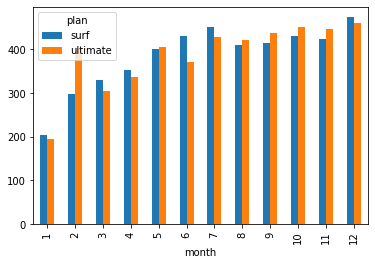

In [53]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.

ave_mon_dur = grand_monthly_table.pivot_table(index= 'month', values= 'duration', columns='plan', aggfunc='mean')
display(ave_mon_dur)
ave_mon_dur.plot(kind= 'bar')
plt.show()

plan,surf,ultimate
month,,
1,406,774
2,2673,2822
3,7590,3651
4,17577,7074
5,30768,11781
6,41836,17435
7,54448,25197
8,66438,29922
9,80360,37626


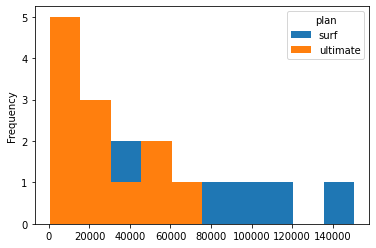

In [54]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.

tot_min_mon = grand_monthly_table.pivot_table(index= 'month', values= 'duration', columns='plan', aggfunc='sum')
display(tot_min_mon)
tot_min_mon.plot(kind= 'hist')
plt.show()

[Calculate the mean and the variable of the call duration to reason on whether users on the different plans have different behaviours for their calls.]

In [55]:
# Calculate the mean and the variance of the monthly call duration

ave_var_mon_dur = grand_monthly_table.pivot_table(index= 'month', values= 'duration', columns='plan', aggfunc=['mean','var', 'std'])
display(ave_var_mon_dur)

mean                       var                       std  \
plan         surf    ultimate          surf      ultimate        surf   
month                                                                   
1      203.000000  193.500000  15842.000000  16572.333333  125.865007   
2      297.000000  403.142857  52226.500000  76889.476190  228.531179   
3      330.000000  304.250000  35809.363636  61984.931818  189.233622   
4      351.540000  336.857143  50866.743265  34888.928571  225.536567   
5      399.584416  406.241379  59754.219754  43841.046798  244.446763   
6      431.298969  370.957447  45592.628436  42503.563367  213.524304   
7      449.983471  427.067797  61005.099725  72563.374635  246.992105   
8      410.111111  421.436620  54344.645963  53645.506640  233.119381   
9      414.226804  437.511628  46595.958656  57070.464569  215.860971   
10     429.729958  450.735849  52278.664056  54261.910512  228.645280   
11     423.325088  445.196850  51607.021602  60593.222847  227.171789   
12     473.836478  459.099338  63629.518918  62503.783400  252.248923   

                   
plan     ultimate  
month              
1      128.733575  
2      277.289517  
3      248.967732  
4      186.785783  
5      209.382537  
6      206.163924  
7      269.375898  
8      231.614997  
9      238.894254  
10     232.941861  
11     246.156907  
12     250.007567

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
It's great that you managed to calculate all the necessary metrics and display them in the table.

plan,surf,ultimate
month,,
1,406,774
2,2673,2822
3,7590,3651
4,17577,7074
5,30768,11781
6,41836,17435
7,54448,25197
8,66438,29922
9,80360,37626


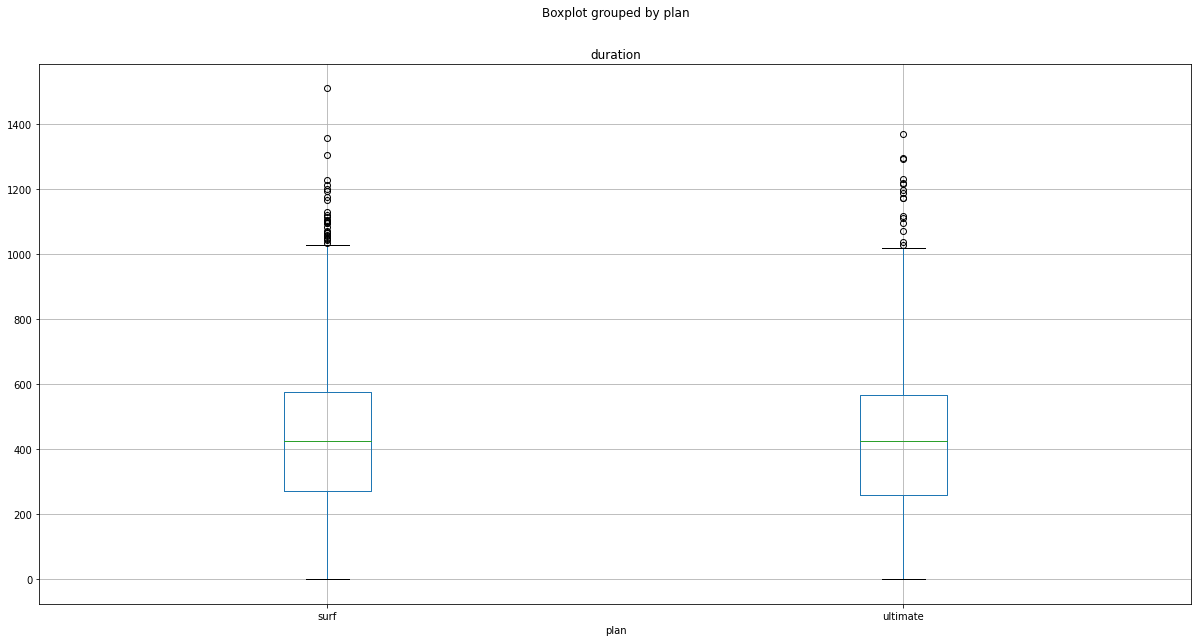

In [56]:
# Plot a boxplot to visualize the distribution of the monthly call duration
mon_dur = grand_monthly_table.pivot_table(index= 'month', values= 'duration', columns='plan', aggfunc='sum')
display(mon_dur)
grand_monthly_table.boxplot(by= 'plan', column=['duration'], figsize=(20,10) )
plt.show()


From the above results we can see that the surf plan has the highest average mins and also the highest total mins per month. Users on the surf plan seem to be making longer phone calls than users on the ultimate plan. We can also see this clearly represented on the box plot. The median talk time for surf is slightly higher than ultimate.

### Messages

plan,surf,ultimate
month,,
1,10.500000,15.500000
2,12.000000,21.571429
3,15.260870,20.250000
4,17.400000,22.047619
5,24.012987,32.103448
6,25.298969,29.340426
7,27.033058,32.830508
8,28.777778,38.478873
9,30.762887,37.895349


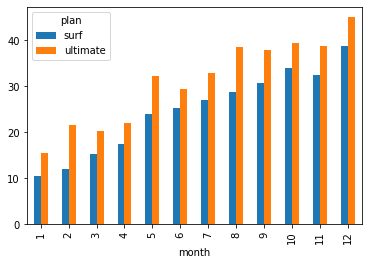

In [57]:
# Compare the number of messages users of each plan tend to send each month

ave_mess = grand_monthly_table.pivot_table(index= 'month', values= 'number_of_messages', columns='plan', aggfunc='mean')
display(ave_mess)
ave_mess.plot(kind= 'bar')
plt.show()

plan,surf,ultimate
month,,
1,21,62
2,108,151
3,351,243
4,870,463
5,1849,931
6,2454,1379
7,3271,1937
8,4662,2732
9,5968,3259


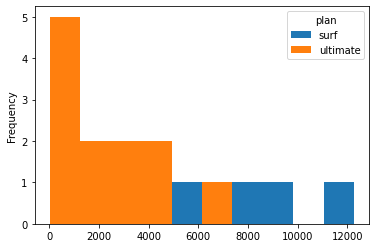

In [58]:
# Compare the total amount of messages sent by customers on each plan 

tot_mess = grand_monthly_table.pivot_table(index= 'month', values= 'number_of_messages', columns='plan', aggfunc='sum')
display(tot_mess)
tot_mess.plot(kind= 'hist')
plt.show()

In [59]:
# Calculate the mean and variance of the monthly messages
ave_var_mess = grand_monthly_table.pivot_table(index= 'month', values= 'number_of_messages', columns='plan', aggfunc=['mean', 'var', 'std'])
display(ave_var_mess)


mean                     var                     std           
plan        surf   ultimate         surf     ultimate       surf   ultimate
month                                                                      
1      10.500000  15.500000   220.500000   313.666667  14.849242  17.710637
2      12.000000  21.571429   386.000000   478.285714  19.646883  21.869744
3      15.260870  20.250000   346.565217   654.386364  18.616262  25.580977
4      17.400000  22.047619   501.591837   544.147619  22.396246  23.326972
5      24.012987  32.103448   847.197198  1297.310345  29.106652  36.018195
6      25.298969  29.340426   914.920103   857.620722  30.247646  29.285162
7      27.033058  32.830508   923.915565   960.488019  30.395979  30.991741
8      28.777778  38.478873  1029.515528  1196.367404  32.086064  34.588544
9      30.762887  37.895349  1003.829496  1050.918331  31.683268  32.417871
10     33.839662  39.443396  1275.465708  1221.106289  35.713663  34.944331
11     32.385159  38.606299  1065.344034  1232.669166  32.639608  35.109389
12     38.600629  45.006623  1458.158612  1549.419956  38.185843  39.362672

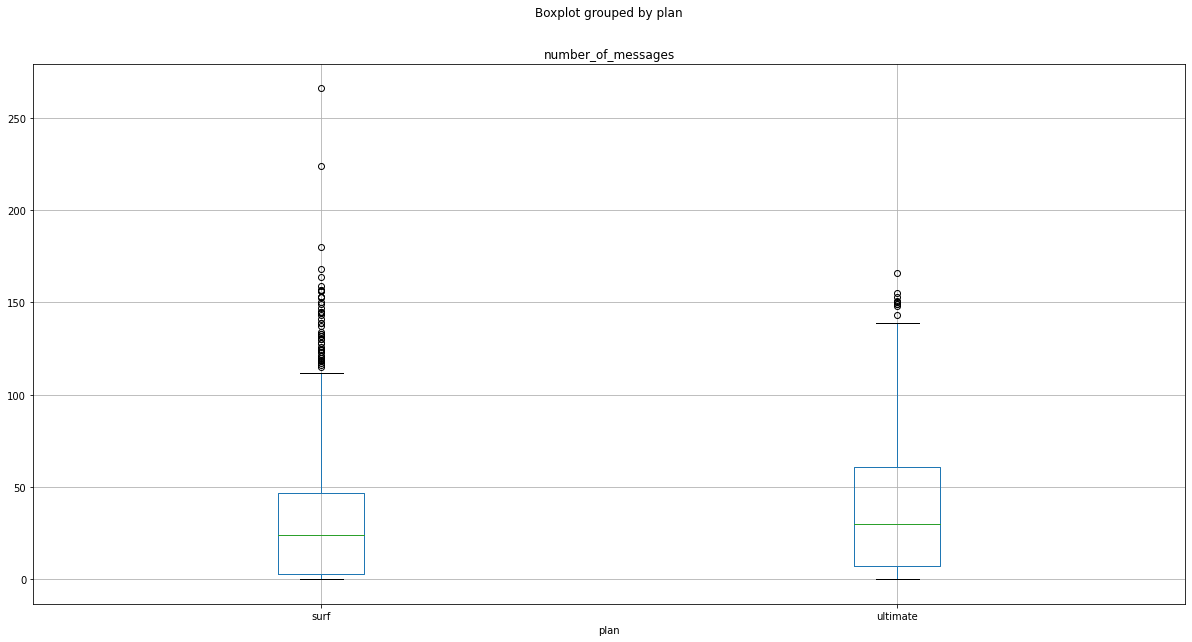

In [60]:
# Plot a boxplot to visualize the distribution of the monthly messages sent
grand_monthly_table.boxplot(by= 'plan', column=['number_of_messages'], figsize=(20,10) )
plt.show()

From the analysis above, we can see that the ultimate plan users seem to have a higher average number of messages sent per month. But when we look at the total number of messages, surf users appear to send more messages overall. Perhaps there are a few customers on the ultimate plan who send lots of messages each month compared to the rest and are therefore outliers as is also seen on the boxplot.

### Internet

plan,surf,ultimate
month,,
1,5000.000000,7250.000000
2,12555.555556,17571.428571
3,13782.608696,18833.333333
4,12380.000000,16476.190476
5,14441.558442,17068.965517
6,15742.268041,15829.787234
7,17280.991736,16796.610169
8,17228.395062,18366.197183
9,17061.855670,17534.883721


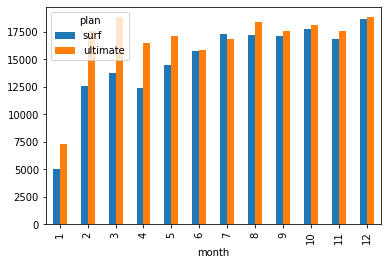

In [61]:
# Compare the average mb used by users per plan
ave_mb = grand_monthly_table.pivot_table(index= 'month', values= 'mb_used', columns='plan', aggfunc='mean')
display(ave_mb)
ave_mb.plot(kind= 'bar')
plt.show()

plan,surf,ultimate
month,,
1,5000.000000,7250.000000
2,12555.555556,17571.428571
3,13782.608696,18833.333333
4,12380.000000,16476.190476
5,14441.558442,17068.965517
6,15742.268041,15829.787234
7,17280.991736,16796.610169
8,17228.395062,18366.197183
9,17061.855670,17534.883721


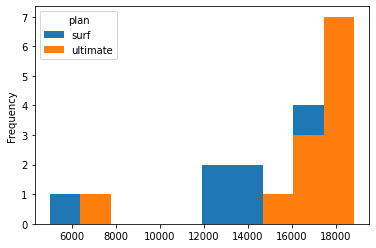

In [62]:
# Compare the amount of internet traffic consumed by users per plan
tot_mb = grand_monthly_table.pivot_table(index= 'month', values= 'mb_used', columns='plan', aggfunc='mean')
display(tot_mb)
tot_mb.plot(kind= 'hist')
plt.show()

In [63]:
# Calculate the mean and variance of the monthly mb used
ave_var_mb = grand_monthly_table.pivot_table(index= 'month', values= 'mb_used', columns='plan', aggfunc=['mean', 'var', 'std'])
display(ave_var_mb)


mean                         var                        std  \
plan           surf      ultimate          surf      ultimate         surf   
month                                                                        
1       5000.000000   7250.000000  1.800000e+07  1.491667e+07  4242.640687   
2      12555.555556  17571.428571  4.727778e+07  3.995238e+07  6875.883782   
3      13782.608696  18833.333333  6.754150e+07  1.408788e+08  8218.363704   
4      12380.000000  16476.190476  6.007714e+07  8.866190e+07  7750.944643   
5      14441.558442  17068.965517  6.209193e+07  5.556650e+07  7879.843551   
6      15742.268041  15829.787234  4.992247e+07  7.210083e+07  7065.583177   
7      17280.991736  16796.610169  6.535372e+07  6.802688e+07  8084.164707   
8      17228.395062  18366.197183  7.565559e+07  6.054970e+07  8698.021972   
9      17061.855670  17534.883721  5.168527e+07  4.923995e+07  7189.247055   
10     17767.932489  18084.905660  6.272134e+07  5.722129e+07  7919.680562   
11     16819.787986  17527.559055  5.788585e+07  5.858455e+07  7608.274981   
12     18606.918239  18827.814570  7.213837e+07  6.329015e+07  8493.431268   

                     
plan       ultimate  
month                
1       3862.210075  
2       6320.789583  
3      11869.237039  
4       9416.045070  
5       7454.294230  
6       8491.220911  
7       8247.841224  
8       7781.368658  
9       7017.118018  
10      7564.475778  
11      7654.054607  
12      7955.510953

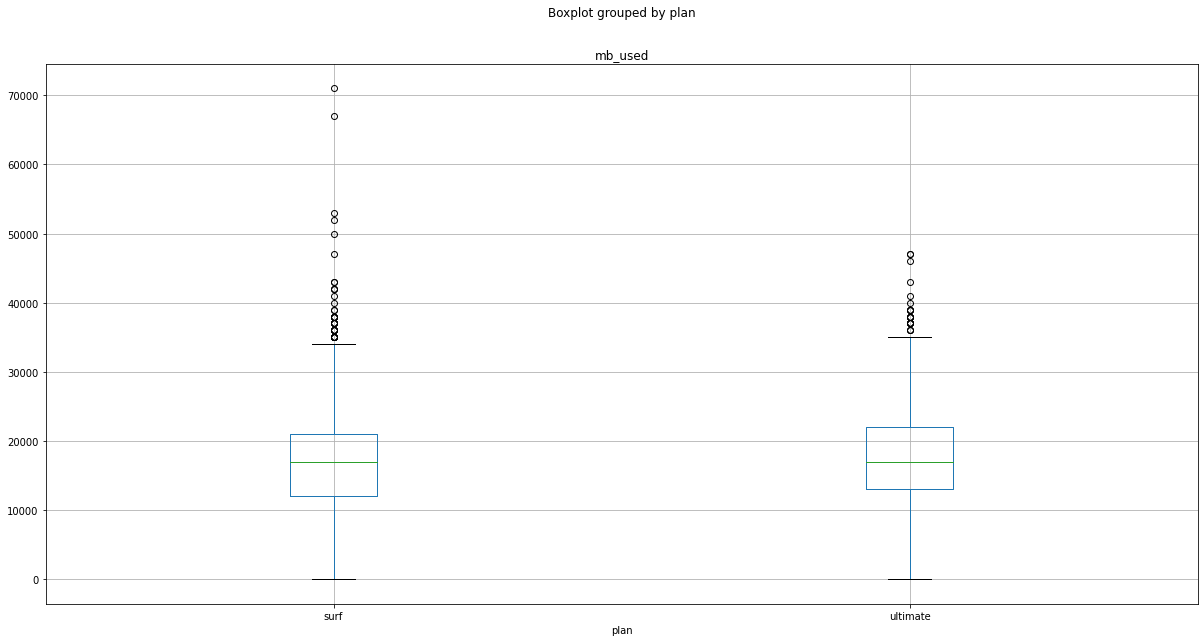

In [64]:
# Plot a boxplot to visualize the distribution of the monthly mb used
grand_monthly_table.boxplot(by= 'plan', column=['mb_used'], figsize=(20,10) )
plt.show()

As is expected, ultimate plan users use more mb per month than surf plan users. Although, the boxplot shows that some surf plan users tend to consume a lot of mb. Seeing as mb on this plan is more expensive than on ultimate after the data limit has been passed, this is quite significant. 

## Revenue

[Likewise you have studied the user behaviour, statistically describe the revenue between the plans.]

plan,surf,ultimate
month,,
1,20.000000,70.000000
2,35.776875,70.000000
3,45.791848,100.716146
4,40.423100,83.111979
5,47.971120,77.844828
6,48.760019,76.003989
7,62.903905,75.478019
8,63.865586,81.827135
9,58.042758,78.123637


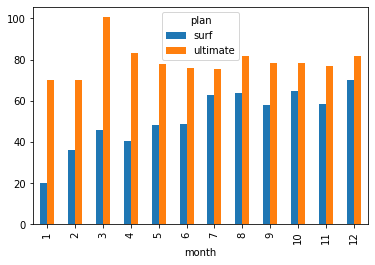

In [65]:
# Compare average monthly rev for each plan
ave_rev = grand_monthly_table.pivot_table(index= 'month', values= 'monthly_rev', columns='plan', aggfunc='mean')
display(ave_rev)
ave_rev.plot(kind= 'bar')
plt.show()

plan,surf,ultimate
month,,
1,40.000000,280.000000
2,321.991875,490.000000
3,1053.212500,1208.593750
4,2021.155000,1745.351562
5,3693.776250,2257.500000
6,4729.721875,3572.187500
7,7611.372500,4453.203125
8,10346.225000,5809.726562
9,11260.295000,6718.632812


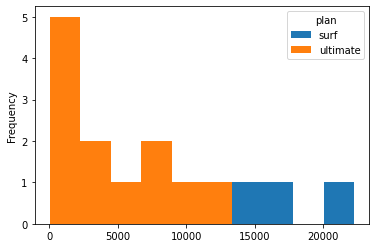

In [66]:
# Compare total monthly rev for each plan
tot_rev = grand_monthly_table.pivot_table(index= 'month', values= 'monthly_rev', columns='plan', aggfunc='sum')
display(tot_rev)
tot_rev.plot(kind= 'hist')
plt.show()

In [67]:
# Calculate the mean and variance of the monthly revenue
ave_var_rev = grand_monthly_table.pivot_table(index= 'month', values= 'monthly_rev', columns='plan', aggfunc=['mean', 'var', 'std'])
display(ave_var_rev)

mean                      var                     std           
plan        surf    ultimate         surf     ultimate       surf   ultimate
month                                                                       
1      20.000000   70.000000     0.000000     0.000000   0.000000   0.000000
2      35.776875   70.000000   431.402479     0.000000  20.770231   0.000000
3      45.791848  100.716146  1513.599164  3175.553848  38.905002  56.352053
4      40.423100   83.111979  1203.391813  1744.148153  34.689938  41.763000
5      47.971120   77.844828  2002.644991   863.817386  44.750922  29.390770
6      48.760019   76.003989  1935.323740   836.836569  43.992315  28.928128
7      62.903905   75.478019  2931.426759   869.993399  54.142652  29.495651
8      63.865586   81.827135  3541.658334  1598.999948  59.511834  39.987497
9      58.042758   78.123637  2250.546814  1089.808545  47.439928  33.012248
10     64.857867   78.244399  3117.570228  1218.985504  55.835206  34.913973
11     58.205799   76.665846  2484.062213   935.082585  49.840367  30.579120
12     70.024910   81.710731  4557.192309  1690.396084  67.506980  41.114427

Seeing as the price for the data plans vary significantly, it's not surprising to see the average monthly revenue for ultimate being higher than that of surf. But when we look at the frequency histogram for total revenue, it confirms yet again that surf brings in more revenue than ultimate.

<div class="alert alert-success">
<b>Reviewer's comment v1:</b>
    
- I will write overall thoughts about the data analysis section:
- Very nice visualization of the data. Great that you used different graph types to check available data.
- Also, nice that you managed to add both plans on one graph.
- If you have time and willing to practice, you can display two charts (histogram and a box plot) using a two-column subplot.

```
    # Create one row with 2 columns
	  fig, axes = plt.subplots(1, 2, figsize=(16, 5))

	  # Create a histogram for the surf plan
	  sns.distplot(... ax=axes[0])
	  # Create a histogram for the second plan
	  sns.distplot(... ax=axes[0])
	
	  # Create a boxplot for both plans
	  sns.boxplot(... ax=axes[1])
```

## Test statistical hypotheses

Let's test the hypothesis that the average revenue from users of the Ultimate and Surf calling plans differs.

H0 - average revenue between both plans are the same.


H1 - average revenue between both plans are not the same.

In [68]:
# Test the hypotheses
df_ave_rev = ave_rev.reset_index()
surf_rev = df_ave_rev['surf']
ultimate_rev = df_ave_rev['ultimate']

alpha = 0.05 # critical statistical significance level
results = st.ttest_ind(surf_rev, ultimate_rev)
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 7.41421053236776e-06
We reject the null hypothesis


Let's test the hypothesis that the average revenue from users in the NY-NJ area is different from that of the users from the other regions.

H0 - average revenue between both areas are the same.


H1 - average revenue between both areass are not the same.

In [69]:
# Test the hypotheses
ny_nj_users = grand_monthly_table[grand_monthly_table['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA']
rest_of_users = grand_monthly_table[grand_monthly_table['city'] != 'New York-Newark-Jersey City, NY-NJ-PA MSA']

ny_nj_table = ny_nj_users.pivot_table(index='month', values='monthly_rev', aggfunc='mean').reset_index()
ny_nj_rev = ny_nj_table['monthly_rev']

rest_of_users_table = rest_of_users.pivot_table(index='month', values='monthly_rev', aggfunc='mean')
rest_of_users_rev = rest_of_users_table['monthly_rev']

alpha = 0.05 # critical statistical significance level
results2 = st.ttest_ind(ny_nj_rev, rest_of_users_rev)
print('p-value:', results2.pvalue)

if results2.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 0.09565992074778348
We can't reject the null hypothesis


<div class="alert alert-success">
<b>Reviewer's comment v1:</b>
    
- Overall great job! Hypotheses have been formulated and tested correctly. Great that you additionally checked data that has been used for the test. 
- It is also possible to compare data sample variances (for equal_var parameter in st.ttest_ind) using Levene test (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html) or Bartlett’s test (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bartlett.html)

## General conclusion

The aim of this project was to determine which prepaid plan brought in more revenue. And from our analysis we concluded that surf brings in more revenue. This is how we did it:

Firstly we examined the data and addressed wrong data types. We then added a month column to some dataframes to help us in further analysis.

Then, we aggregated the data from the different dataframes and merged the tables. This gave us a grand table with a lot of data.

There were some missing values which we filled in based on the average for each plan.

Using the data on the plans, we calculated monthly revenue for each client and added it to our grand table.

With this, we were able to run the analysis and plot various graphs that support our conclusion.

<div class="alert alert-success" role="alert">
<b>Reviewer's comment v1:</b>
    
- You conducted an outstanding research with correct interim findings, clean code and nice visualisation.
- I also like your overall conclusion. It is very structured and provides insights and recommendations to the business.